# Lecure 6.2 Even more plotting and data analysis

### No demos today, just tons of coding!

## Week 6 Homework:
Due Monday at midnight

Watch the following seminar video and analyse her presentation in terms of the criteria used in our grading rubric. 
https://seminar.cgd.ucar.edu/2019/CGD_20190917_olivia_clifton.mp4

In the notes section, address how she met all of the guidelines for a good talk (first page of rubric). You should have about a page of text.

Now fill out the rubric. In each section of the rubric, instead of scoring, write out what she did or did not do meet the criteria. Give concrete examples.

Bonus points if you can summarize what her talk was about and why it is relevant/important, and how it might relate to your research (if it does).

Load it into github and call it HW_6_yourname

## Warm up exercises
### W 1

W 1.1. Make an 16 by 20 array of zeros. Change each 2x2 corner of the array to a different number. 

W 1.2 Plot your result in two subplots, one using pcolormesh and one using imshow. What is the difference between these two methods? 

W 1.3 Add a colorbar that works for both subplots. Label your axes in each case, what do they represent in each case?

W 1.4 (Advanced, optional) label your colorbar.

W 1.5 (Advanced) 
- note the options for interpolation with imshow: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/interpolation_methods.html#sphx-glr-gallery-images-contours-and-fields-interpolation-methods-py 
- Make a similar plot of your matrix and demonstrate the different options
- What are the options for pcolormesh? Demonstrate

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 1.1
array = np.zeros((16,20))
array[0:2, 0:2] = 2
array[0:2, -2:20] = 2
array[14:16, 0:2] = 2
array[14:16, -2:20] = 2

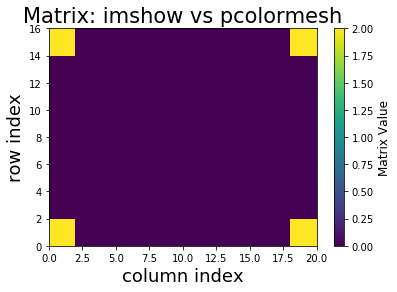

In [4]:
# 1.2
# pcolormesh represents an array even when its non-uniform and
# reverse the y-index, while imshow, used more to represent images,
# uses a fixed pixel cell size to represent the array and uses a 
# y-axis labeling convention common in image analysis.
# https://stackoverflow.com/questions/21166679/when-to-use-imshow-over-pcolormesh
plt.pcolormesh(array)
#plt.imshow(np)
cbar = plt.colorbar()
plt.xlabel("column index", fontsize=18)
plt.ylabel("row index", fontsize=18)
plt.title("Matrix: imshow vs pcolormesh", fontsize=21)
cbar.set_label("Matrix Value", fontsize=12)

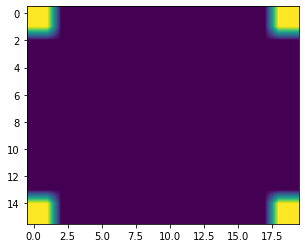

In [5]:
plt.imshow(array, interpolation='bilinear')

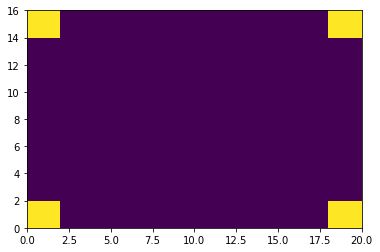

In [6]:
plt.pcolormesh(array)

### W 2

W 2.1 Plot the height function $H = -100(lat-40)^2 -400{(lon+106)^2} + 8000$ over 38 to 42 N and 108 to 104 W. 

W 2.2 Label your axes, add a colorbar, and make the fonts readable for a presentation (aka larger). 

W 2.3 What mountain range is this a rough approximation to? Add this to the title.

W 2.4 (Advanced) plot this in 3D

Text(0.5, 0.92, 'Height of the Rocky Mts.')

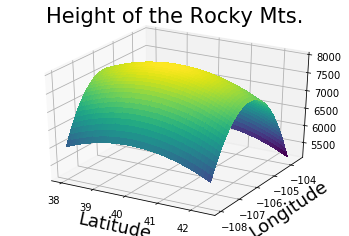

In [156]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig = plt.figure()
ax = fig.gca(projection='3d')

lat = np.arange(38, 42.5, 0.1)
lon = np.arange(-108, -103.5, 0.1)
LAT, LON = np.meshgrid(lat, lon)
hite = (-100 * (LAT - 40)**2) - (400 * (LON + 106)**2) + 8000

#plt.pcolormesh(LAT, LON, hite)
ax.plot_surface(LAT, LON, hite, cmap='viridis', linewidth=0, antialiased=False)
#plt.colorbar()
cbar.set_label("Height", fontsize=18)
plt.xlabel("Latitude", fontsize=18)
plt.ylabel("Longitude", fontsize=18)
plt.title("Height of the Rocky Mts.", fontsize=21)


## Lab work 1

Do this Excel Pandas tutorial that uses execl files with multiple sheets:

https://www.dataquest.io/blog/excel-and-pandas/

Note, we will be doing some exercises with this data set next time

In [145]:
import pandas as pd
excel_file = 'movies.xls'
movies_sheet1 = pd.read_excel(excel_file, sheet_name=0)
movies_sheet2 = pd.read_excel(excel_file, sheet_name=1)
movies_sheet3 = pd.read_excel(excel_file, sheet_name=2)
movies_sheet3.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,127 Hours,2010.0,Adventure|Biography|Drama|Thriller,English,USA,R,94.0,1.85,18000000.0,18329466.0,...,11000.0,642.0,223.0,11984,63000,0.0,279179,440.0,450.0,7.6
1,3 Backyards,2010.0,Drama,English,USA,R,88.0,NaN,300000.0,NaN,...,795.0,659.0,301.0,1884,92,0.0,554,23.0,20.0,5.2
2,3,2010.0,Comedy|Drama|Romance,German,Germany,Unrated,119.0,2.35,NaN,59774.0,...,24.0,20.0,9.0,69,2000,0.0,4212,18.0,76.0,6.8
3,8: The Mormon Proposition,2010.0,Documentary,English,USA,R,80.0,1.78,2500000.0,99851.0,...,191.0,12.0,5.0,210,0,0.0,1138,30.0,28.0,7.1
4,A Turtle's Tale: Sammy's Adventures,2010.0,Adventure|Animation|Family,English,France,PG,88.0,2.35,NaN,NaN,...,783.0,749.0,602.0,3874,0,2.0,5385,22.0,56.0,6.1


In [146]:
movies = pd.concat([movies_sheet1, movies_sheet2, movies_sheet3], sort=False)

In [147]:

movies.head()
movies.tail()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
1599,War & Peace,NaN,Drama|History|Romance|War,English,UK,TV-14,NaN,16.00,NaN,NaN,...,1000.0,888.0,502.0,4528,11000,1.0,9277,44.0,10.0,8.2
1600,Wings,NaN,Comedy|Drama,English,USA,NaN,30.0,1.33,NaN,NaN,...,685.0,511.0,424.0,1884,1000,5.0,7646,56.0,19.0,7.3
1601,Wolf Creek,NaN,Drama|Horror|Thriller,English,Australia,NaN,NaN,2.00,NaN,NaN,...,511.0,457.0,206.0,1617,954,0.0,726,6.0,2.0,7.1
1602,Wuthering Heights,NaN,Drama|Romance,English,UK,NaN,142.0,NaN,NaN,NaN,...,27000.0,698.0,427.0,29196,0,2.0,6053,33.0,9.0,7.7
1603,Yu-Gi-Oh! Duel Monsters,NaN,Action|Adventure|Animation|Family|Fantasy,Japanese,Japan,NaN,24.0,NaN,NaN,NaN,...,0.0,NaN,NaN,0,124,0.0,12417,51.0,6.0,7.0


In [150]:
sort_by_gross = movies.sort_values(['Gross Earnings'], ascending=False)

In [157]:
gross = sort_by_gross['Gross Earnings'].head(10)

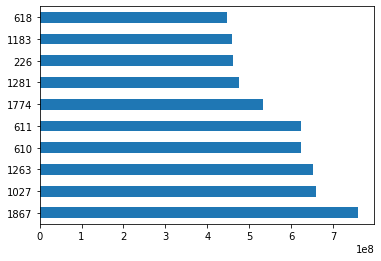

In [158]:
gross.plot(kind='barh')

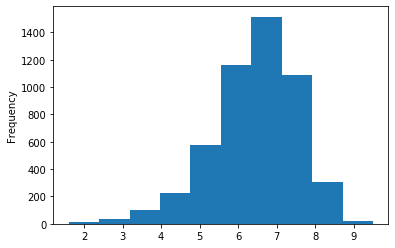

In [159]:
movies['IMDB Score'].plot(kind="hist")

In [160]:
movies.describe()

,Year,Duration,Aspect Ratio,Budget,Gross Earnings,Facebook Likes - Director,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
count,4935.000000,5028.000000,4714.000000,4.551000e+03,4.159000e+03,4938.000000,5035.000000,5029.000000,5020.000000,5042.000000,5042.000000,5029.000000,5.042000e+03,5022.000000,4993.000000,5042.000000
mean,2002.470517,107.201074,2.220403,3.975262e+07,4.846841e+07,686.621709,6561.323932,1652.080533,645.009761,9700.959143,7527.457160,1.371446,8.368475e+04,272.770808,140.194272,6.442007
std,12.474599,25.197441,1.385113,2.061149e+08,6.845299e+07,2813.602405,15021.977635,4042.774685,1665.041728,18165.101925,19322.070537,2.013683,1.384940e+05,377.982886,121.601675,1.125189
min,1916.000000,7.000000,1.180000,2.180000e+02,1.620000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000e+00,1.000000,1.000000,1.600000
25%,1999.000000,93.000000,1.850000,6.000000e+06,5.340988e+06,7.000000,614.500000,281.000000,133.000000,1411.250000,0.000000,0.000000,8.599250e+03,65.000000,50.000000,5.800000
50%,2005.000000,103.000000,2.350000,2.000000e+07,2.551750e+07,49.000000,988.000000,595.000000,371.500000,3091.000000,166.000000,1.000000,3.437100e+04,156.000000,110.000000,6.600000
75%,2011.000000,118.000000,2.350000,4.500000e+07,6.230944e+07,194.750000,11000.000000,918.000000,636.000000,13758.750000,3000.000000,2.000000,9.634700e+04,326.000000,195.000000,7.200000
max,2016.000000,511.000000,16.000000,1.221550e+10,7.605058e+08,23000.000000,640000.000000,137000.000000,23000.000000,656730.000000,349000.000000,43.000000,1.689764e+06,5060.000000,813.000000,9.500000


In [164]:
movies.columns = ['Title', 'Year', 'Genres', 'Language', 'Country', 'Content Rating', 'Duration', 'Aspect Ratio', 'Budget', 'Gross Earnings', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Facebook Likes - Director', 'Facebook Likes - Actor 1', 'Facebook Likes - Actor 2', 'Facebook Likes - Actor 3', 'Facebook Likes - cast Total', 'Facebook likes - Movie', 'Facenumber in posters', 'User Votes', 'Reviews by Users', 'Reviews by Crtiics', 'IMDB Score']
movies.head()

,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 1,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score
0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,...,436.0,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,...,2.0,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8
2,The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,...,81.0,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3
3,Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,...,136.0,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3
4,Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,...,426.0,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0


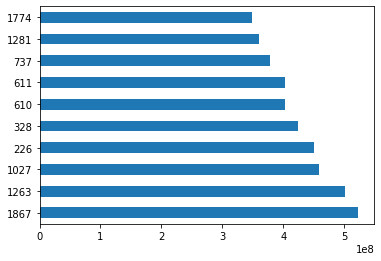

In [169]:
movies["Net Earnings"] = movies["Gross Earnings"] - movies["Budget"]
sorted_movies = movies[['Net Earnings']].sort_values(['Net Earnings'], 
                                                     ascending=[False]).head(10)['Net Earnings'].plot.barh()
plt.show()

In [170]:
movies_subset = movies[['Year', 'Gross Earnings']]
movies_subset.head()


,Year,Gross Earnings
0,1916.0,NaN
1,1920.0,3000000.0
2,1925.0,NaN
3,1927.0,26435.0
4,1929.0,9950.0


In [171]:
earnings_by_year = movies_subset.pivot_table(index=['Year'])
earnings_by_year.head()

,Gross Earnings
Year,
1920.0,3000000.0
1927.0,26435.0
1929.0,1408975.0
1933.0,2300000.0
1935.0,3000000.0


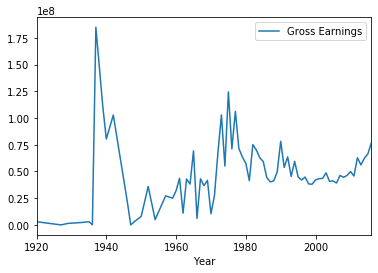

In [172]:
earnings_by_year.plot()
plt.show()

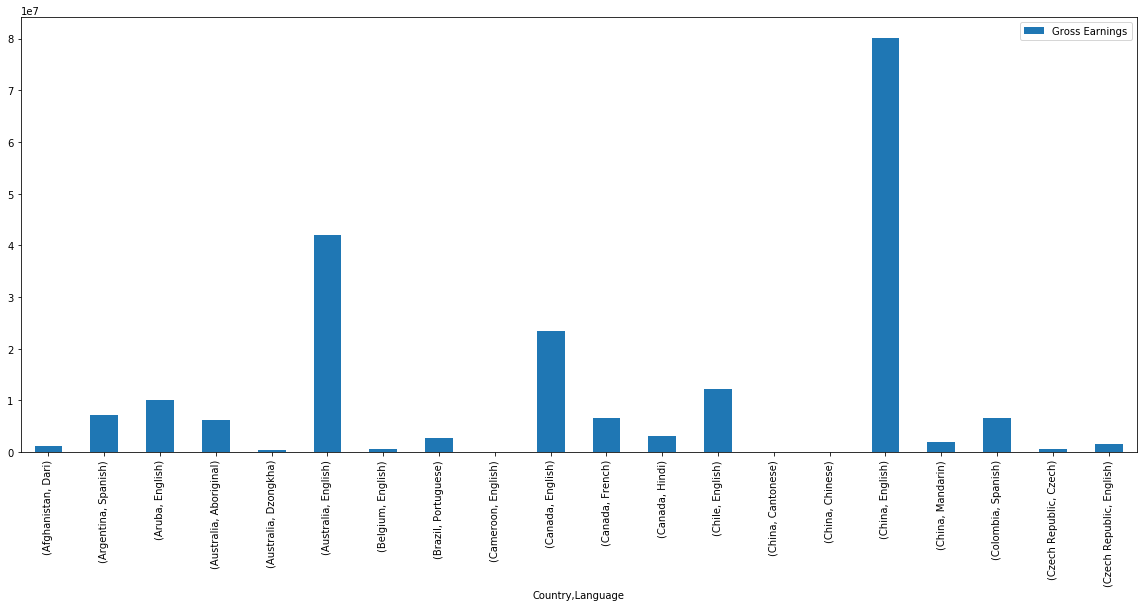

In [175]:
movies_subset = movies[['Country', 'Language', 'Gross Earnings']]
movies_subset.head()
earnings_by_co_lang = movies_subset.pivot_table(index=['Country', 'Language'])
earnings_by_co_lang.head()
earnings_by_co_lang.head(20).plot(kind='bar', figsize=(20,8))
plt.show()

In [176]:
movies.to_excel('output.xlsx')
movies.head()


,Title,Year,Genres,Language,Country,Content Rating,Duration,Aspect Ratio,Budget,Gross Earnings,...,Facebook Likes - Actor 2,Facebook Likes - Actor 3,Facebook Likes - cast Total,Facebook likes - Movie,Facenumber in posters,User Votes,Reviews by Users,Reviews by Crtiics,IMDB Score,Net Earnings
0,Intolerance: Love's Struggle Throughout the Ages,1916.0,Drama|History|War,NaN,USA,Not Rated,123.0,1.33,385907.0,NaN,...,22.0,9.0,481,691,1.0,10718,88.0,69.0,8.0,NaN
1,Over the Hill to the Poorhouse,1920.0,Crime|Drama,NaN,USA,NaN,110.0,1.33,100000.0,3000000.0,...,2.0,0.0,4,0,1.0,5,1.0,1.0,4.8,2900000.0
2,The Big Parade,1925.0,Drama|Romance|War,NaN,USA,Not Rated,151.0,1.33,245000.0,NaN,...,12.0,6.0,108,226,0.0,4849,45.0,48.0,8.3,NaN
3,Metropolis,1927.0,Drama|Sci-Fi,German,Germany,Not Rated,145.0,1.33,6000000.0,26435.0,...,23.0,18.0,203,12000,1.0,111841,413.0,260.0,8.3,-5973565.0
4,Pandora's Box,1929.0,Crime|Drama|Romance,German,Germany,Not Rated,110.0,1.33,NaN,9950.0,...,20.0,3.0,455,926,1.0,7431,84.0,71.0,8.0,NaN


In [179]:
writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')
movies.to_excel(writer, index=False, sheet_name='report')
workbook = writer.bookworksheet = writer.sheets['report']


In [180]:
writer.save()

## Lab work 2 (if time)

Pick a pandas tutorial video:

https://github.com/justmarkham/pandas-videos